In [26]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

In [27]:
# Importing the data.
DF = pd.read_csv("/content/Student_Performance.csv")
DF.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Checking for number of entries, datatypes of each attribute, null values.
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
# Getting the min, max, mean, std, median, Q1 & Q3 of each attribute.
DF.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# Getting the names of each columns.
numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
categorical_cols = ['Extracurricular Activities']
target = ['Performance Index']

In [28]:
# Setting aside the test data. Only working with training data.
train_DF, test_DF = train_test_split(DF, test_size=0.2, random_state=42)

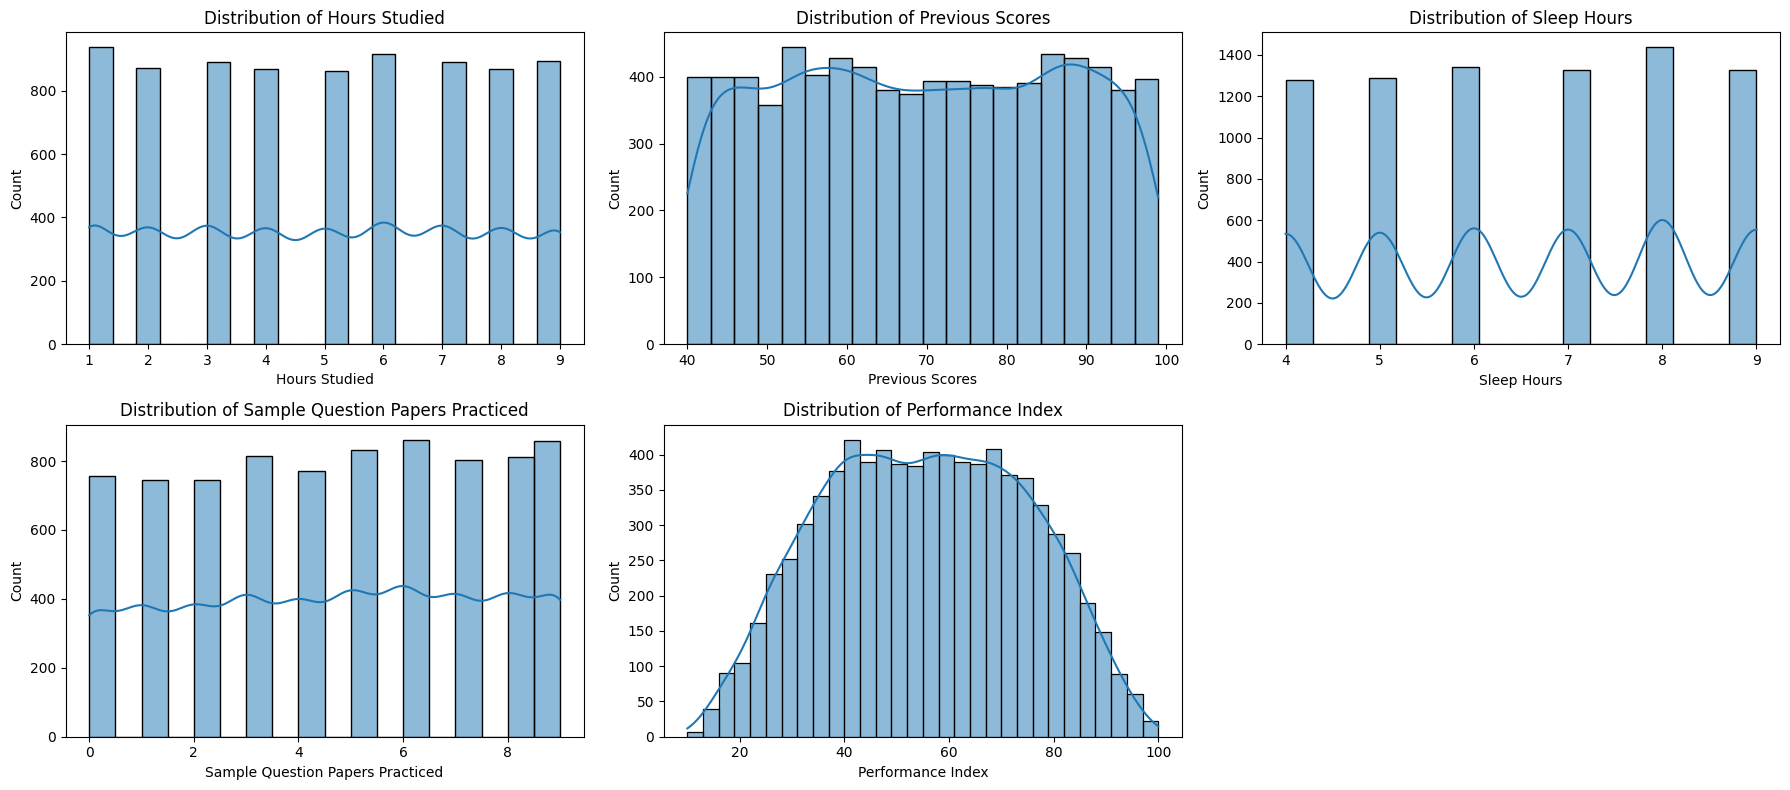

In [7]:
# Histograms of every numeric columns.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols + target):
    sns.histplot(data=train_DF, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

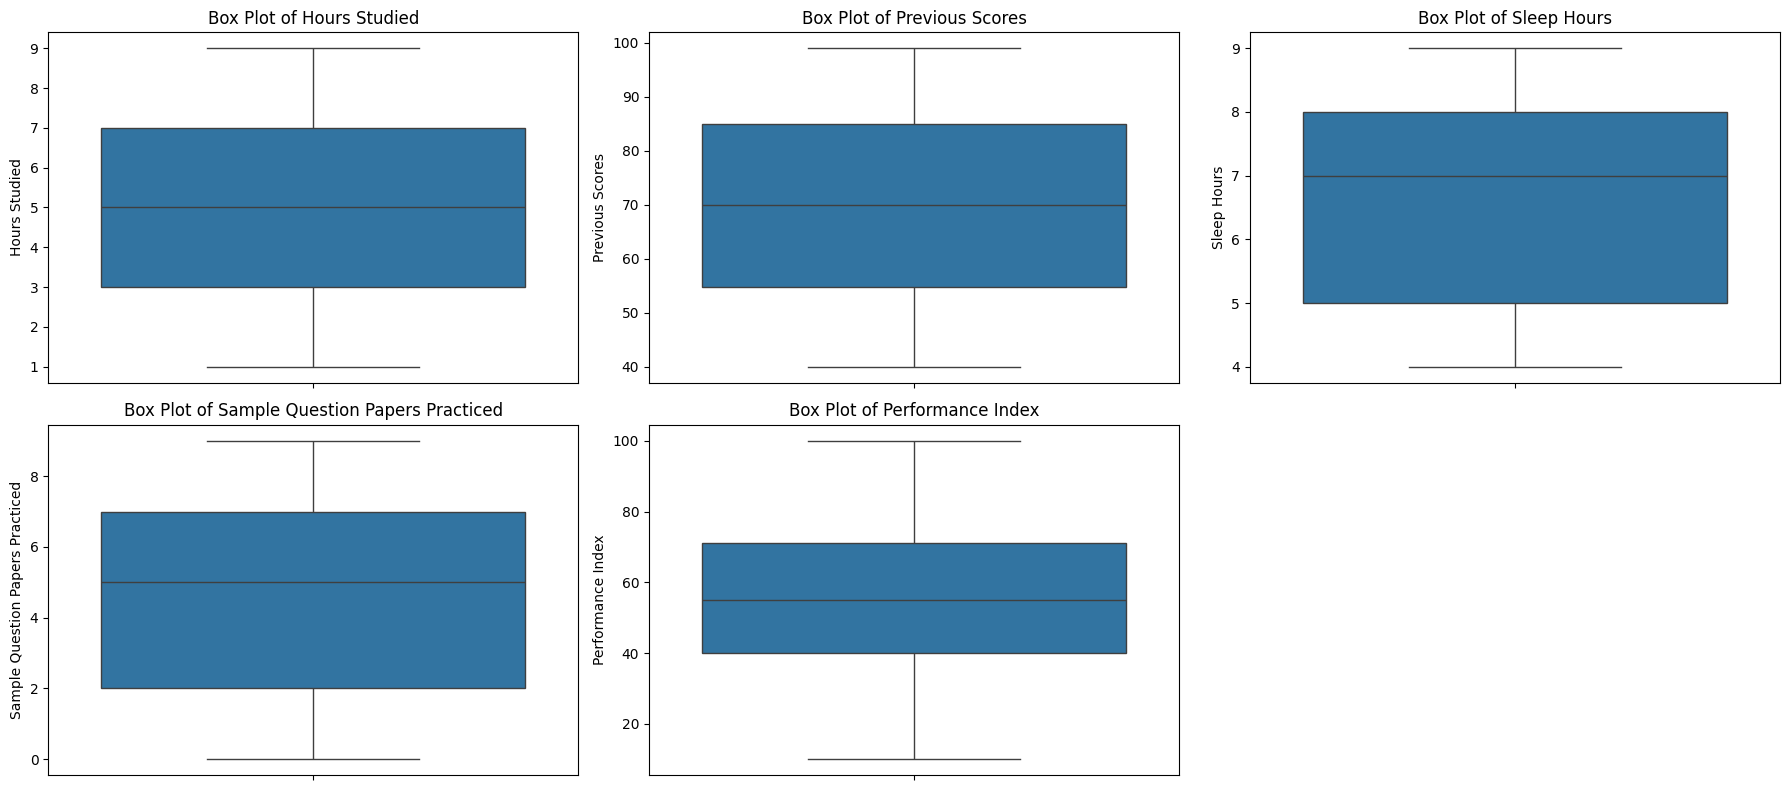

In [8]:
# Boxplot and checking for outliars.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols + target):
    sns.boxplot(data=train_DF, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

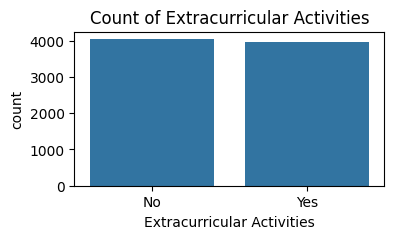

In [9]:
# Bar plot for categorical column
plt.figure(figsize=(4, 2))
sns.countplot(data=train_DF, x='Extracurricular Activities')
plt.title('Count of Extracurricular Activities')
plt.show()

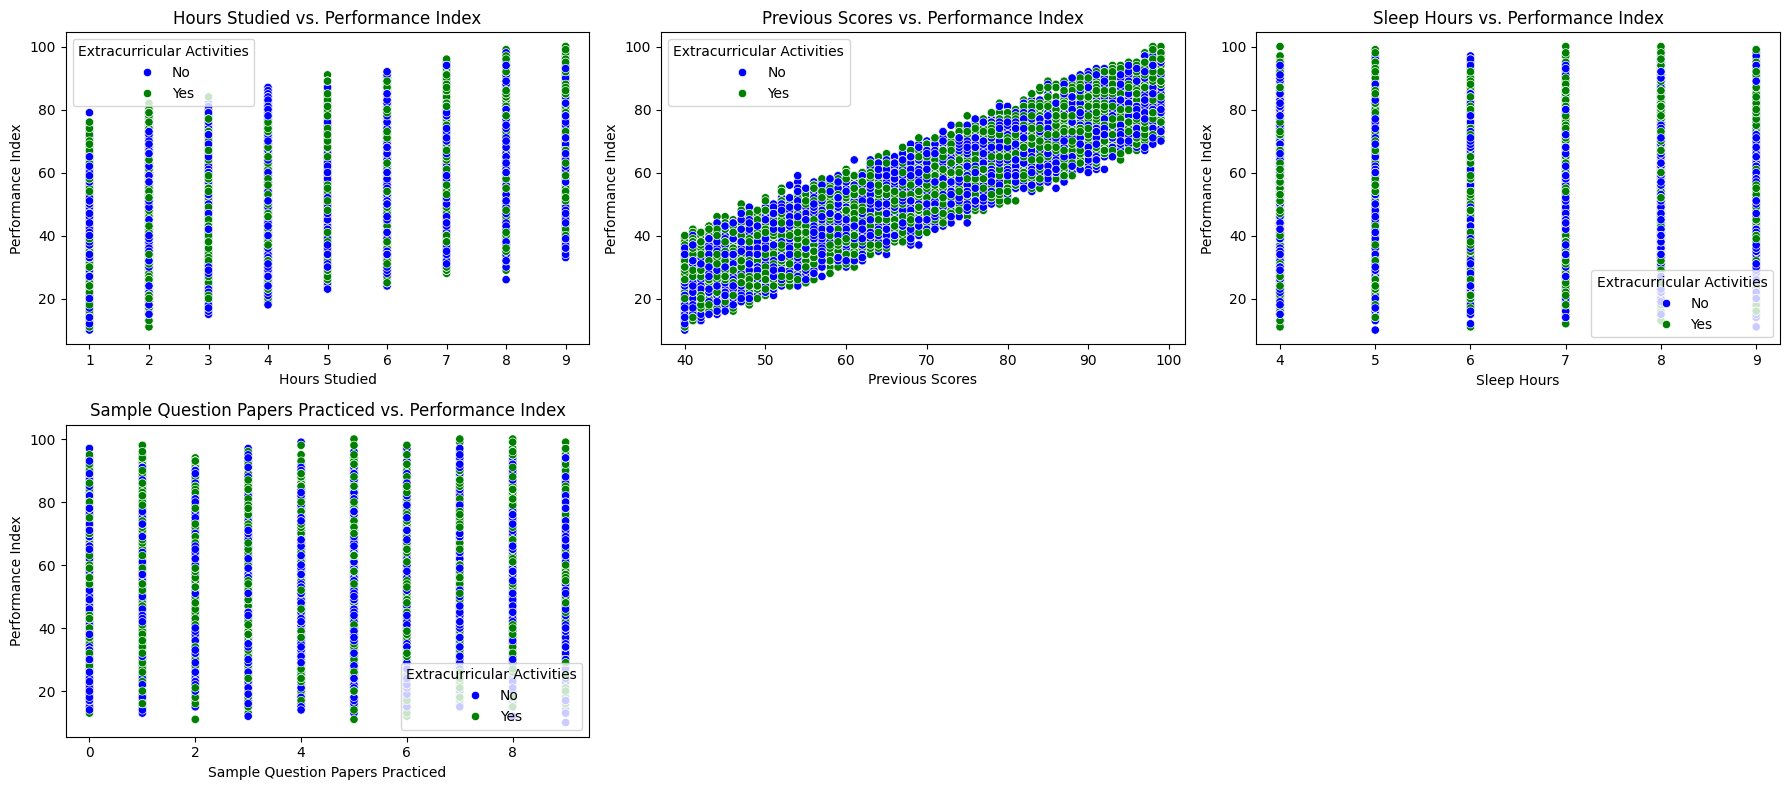

In [10]:
# Scatter plots of Input features with target.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=train_DF, x=col, y=target[0], hue='Extracurricular Activities', palette=['blue', 'green'], ax=axes[i])
    axes[i].set_title(f'{col} vs. {target[0]}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

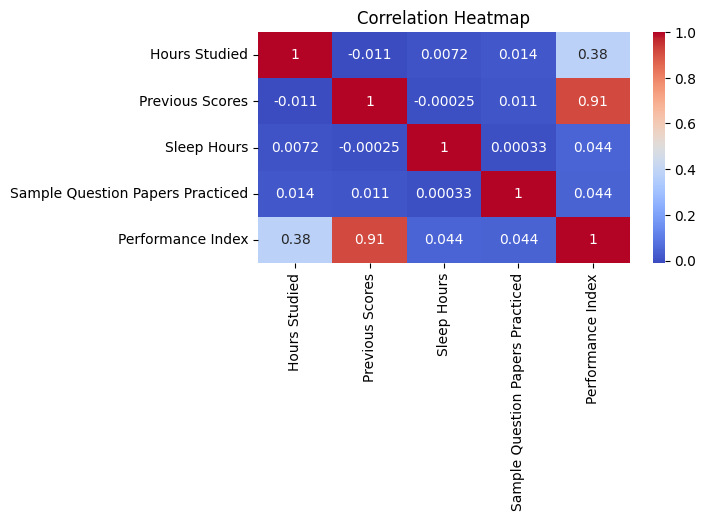

In [11]:
# Pearson Correlation Coefficient Matrix
plt.figure(figsize=(6, 3))
sns.heatmap(train_DF[numeric_cols + target].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Convert 'Yes'/'No' to 1/0 in the 'Extracurricular Activities' column
train_DF['Extracurricular Activities'] = train_DF['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [30]:
# Splitting the training data into training and validation sets.
X = train_DF[numeric_cols + categorical_cols]
y = train_DF[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scaling the data using standard scalar (can also use min-max scalar)
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [32]:
# Training Using Simple Linear Regression.
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LR_model.coef_

array([[ 7.38594759, 17.62748954,  0.81436978,  0.55486   ,  0.60610228]])

In [33]:
# Evaluating Simple Linear Regression result on validation set.
y_val_predict_LR = LR_model.predict(X_val)
r2_val_LR = r2_score(y_val, y_val_predict_LR)

print(r2_val_LR)

0.9891166902432462


In [34]:
# Training Using Ridge Regression.
ridge_model = Ridge()

param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 5, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print(best_ridge)

best_ridge.coef_

Ridge(alpha=0.1)


array([[ 7.38582891, 17.6272126 ,  0.81435772,  0.55486286,  0.6060624 ]])

In [35]:
# Evaluating Ridge Regression result on validation set.
y_val_predict_ridge = best_ridge.predict(X_val)
r2_val_ridge = r2_score(y_val, y_val_predict_ridge)

print(r2_val_ridge)

0.9891166354251073


In [36]:
# Training Using Lasso Regression.
lasso_model = Lasso()

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 5, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

best_lasso = lasso_grid.best_estimator_
print(best_lasso)

best_lasso.coef_

Lasso(alpha=0.01)


array([ 7.37615594, 17.61759145,  0.80416811,  0.54561568,  0.56586549])

In [37]:
# Evaluating Lasso Regression result on validation set.
y_val_predict_lasso = best_lasso.predict(X_val)
r2_val_lasso = r2_score(y_val, y_val_predict_lasso)

print(r2_val_lasso)

0.9891154724827544


In [38]:
# Training Using Elastic Net.
EN_model = ElasticNet()

param_grid_elastic_net = {
    'alpha': [0.01, 0.1, 1.0, 5, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic_net_grid = GridSearchCV(EN_model, param_grid_elastic_net, cv=5, scoring='r2')
elastic_net_grid.fit(X_train, y_train)

best_elastic_net = elastic_net_grid.best_estimator_
print(best_elastic_net)

best_elastic_net.coef_

ElasticNet(alpha=0.01, l1_ratio=0.9)


array([ 7.36955573, 17.60088399,  0.80442791,  0.5467293 ,  0.56749158])

In [39]:
# Evaluating Elastic Net result on validation set.
y_val_predict_EN = best_elastic_net.predict(X_val)
r2_val_EN = r2_score(y_val, y_val_predict_EN)

print(r2_val_EN)

0.9891099310409525


### Evaluating performance in test data.

In [40]:
# Preprocessing test data.
test_DF['Extracurricular Activities'] = test_DF['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

X_test = test_DF[numeric_cols + categorical_cols]
y_test = test_DF[target]

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

<ipython-input-40-0a3f811292f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [41]:
# Evaluation on test data.
y_pred_LR = LR_model.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_EN = best_elastic_net.predict(X_test)

r2_LR = r2_score(y_test, y_pred_LR)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_EN = r2_score(y_test, y_pred_EN)

[0.9889778235674169, 0.9889776174850723, 0.9889642901118728, 0.988950287451736]


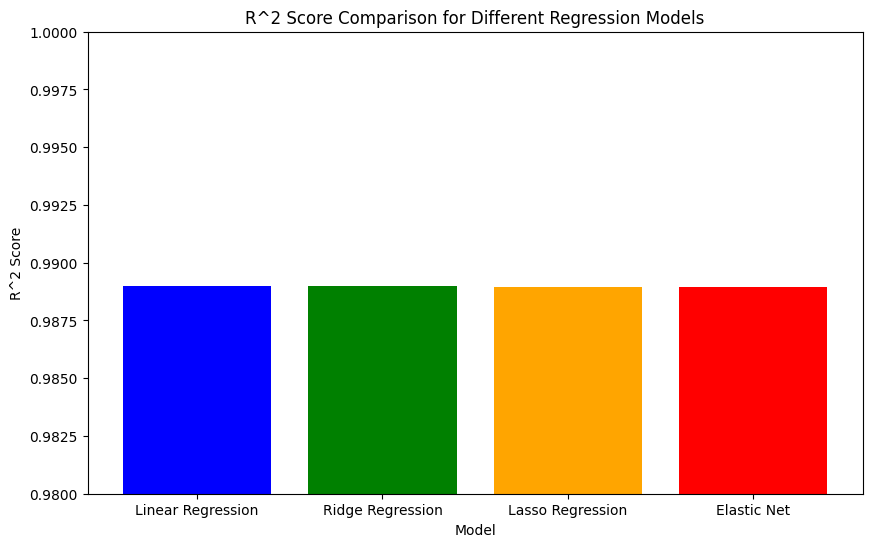

In [42]:
# Plotting the r2 scores.
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']
r2_scores = [r2_LR, r2_ridge, r2_lasso, r2_EN]

print(r2_scores)

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison for Different Regression Models')
plt.ylim(0.98, 1)
plt.show()